### Problem Statement
#####  predicting turbine energy yield (TEY) using ambient variables as features.


In [42]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Data Collection And Description

In [4]:
data=pd.read_csv('gas_turbines.csv')

In [5]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
x=data.drop('TEY',axis=1)
y=data.loc[:,['TEY']]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=0)

In [12]:
model=Sequential()
model.add(Dense(2,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='linear'))
opt=SGD(learning_rate=0.04,momentum=0.9)

In [13]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [14]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500)

Epoch 1/500
329/329 [==============================] - 3s 3ms/step - loss: 15623.4062 - mae: 70.6345 - val_loss: 280.3811 - val_mae: 13.1214
Epoch 2/500
329/329 [==============================] - 1s 2ms/step - loss: 270.6120 - mae: 12.6765 - val_loss: 274.3620 - val_mae: 12.7222
Epoch 3/500
329/329 [==============================] - 1s 3ms/step - loss: 266.0868 - mae: 12.5644 - val_loss: 268.7854 - val_mae: 12.5817
Epoch 4/500
329/329 [==============================] - 1s 2ms/step - loss: 259.9526 - mae: 12.4279 - val_loss: 265.0514 - val_mae: 12.8765
Epoch 5/500
329/329 [==============================] - 1s 3ms/step - loss: 253.3537 - mae: 12.2830 - val_loss: 254.2561 - val_mae: 12.4002
Epoch 6/500
329/329 [==============================] - 1s 3ms/step - loss: 244.4104 - mae: 12.0677 - val_loss: 244.8286 - val_mae: 12.1449
Epoch 7/500
329/329 [==============================] - 1s 4ms/step - loss: 235.0939 - mae: 11.8609 - val_loss: 234.3578 - val_mae: 11.8080
Epoch 8/500
329/329 [====

In [15]:
model.evaluate(x_train,y_train)

329/329 [==============================] - 1s 1ms/step - loss: 0.7953 - mae: 0.6574


[0.795321524143219, 0.6574268341064453]

In [16]:
model.evaluate(x_test,y_test)

141/141 [==============================] - 0s 1ms/step - loss: 0.7534 - mae: 0.6416


[0.7534441351890564, 0.6416264176368713]

In [17]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

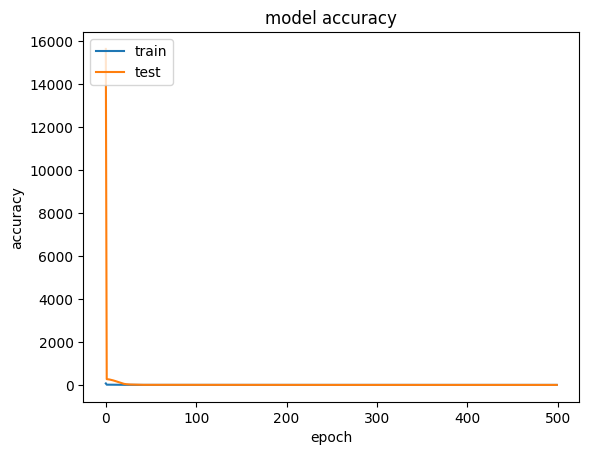

In [20]:
plt.plot(history.history['mae'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
y_pred=model.predict(x_test)

141/141 [==============================] - 0s 995us/step


In [24]:
preds=pd.DataFrame(y_pred,columns=['prediction'])
preds

,prediction
0,133.877945
1,157.334473
2,133.602936
3,134.376816
4,132.861267
...,...
4507,133.470093
4508,135.927429
4509,134.395935
4510,153.155914


In [25]:
preds.insert(1,'y_test',y_test)

In [26]:
preds

,prediction,y_test
0,133.877945,NaN
1,157.334473,NaN
2,133.602936,NaN
3,134.376816,NaN
4,132.861267,NaN
...,...,...
4507,133.470093,135.78
4508,135.927429,NaN
4509,134.395935,NaN
4510,153.155914,NaN


### 2nd Problem Statement
#### PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


## Data Collection And Description

In [31]:
data=pd.read_csv('forestfires.csv')

In [32]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [33]:
data.shape

(517, 31)

In [34]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [35]:
data.duplicated().sum()

8

In [36]:
data.drop_duplicates(inplace=True)

In [37]:
data.reset_index(inplace=True)

In [38]:
data.duplicated().sum()

0

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          509 non-null    int64  
 1   month          509 non-null    object 
 2   day            509 non-null    object 
 3   FFMC           509 non-null    float64
 4   DMC            509 non-null    float64
 5   DC             509 non-null    float64
 6   ISI            509 non-null    float64
 7   temp           509 non-null    float64
 8   RH             509 non-null    int64  
 9   wind           509 non-null    float64
 10  rain           509 non-null    float64
 11  area           509 non-null    float64
 12  dayfri         509 non-null    int64  
 13  daymon         509 non-null    int64  
 14  daysat         509 non-null    int64  
 15  daysun         509 non-null    int64  
 16  daythu         509 non-null    int64  
 17  daytue         509 non-null    int64  
 18  daywed    

In [40]:
data.drop('index',axis=1,inplace=True)

In [41]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [43]:
le=LabelEncoder()

In [44]:
data1=data.drop(columns=['month','day'],axis=1)
data1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [45]:
data1['size_category']=le.fit_transform(data1['size_category'])

<AxesSubplot: >

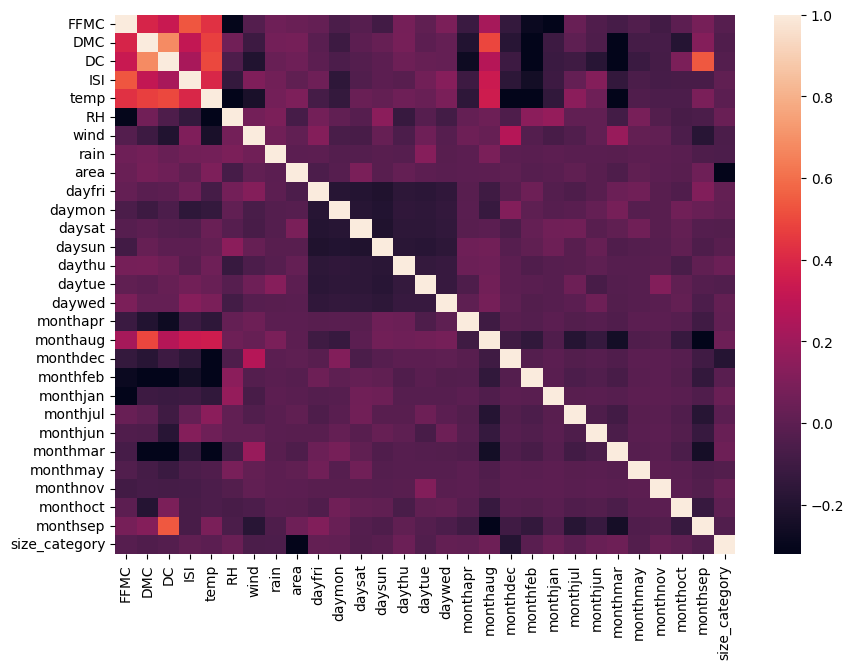

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(data1.corr(),robust=True)

In [49]:
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [50]:
data1.duplicated().sum()

0

In [51]:
data1.rename(columns={'size_cotegory':'size'},inplace=True,errors='raised')

In [52]:
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [53]:
x=data1.drop('size_category',axis=1)
y=data1.iloc[:,[-1]]
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
504,0
505,0
506,0
507,1


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [55]:
y_train.value_counts()

size_category
1                262
0                 94
dtype: int64

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
sm=SMOTE()

In [61]:
x_train,y_train=sm.fit_resample(x_train,y_train)

In [70]:
y_train.value_counts()

size_category
0                262
1                262
dtype: int64

In [63]:
model=Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [64]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [65]:
history=model.fit(x_train,y_train,validation_split=.33,epochs=500)

Epoch 1/500
11/11 [==============================] - 1s 23ms/step - loss: 10.8996 - accuracy: 0.7350 - val_loss: 36.6169 - val_accuracy: 0.0231
Epoch 2/500
11/11 [==============================] - 0s 5ms/step - loss: 9.6316 - accuracy: 0.7350 - val_loss: 32.1658 - val_accuracy: 0.0231
Epoch 3/500
11/11 [==============================] - 0s 6ms/step - loss: 8.4533 - accuracy: 0.7350 - val_loss: 28.1563 - val_accuracy: 0.0231
Epoch 4/500
11/11 [==============================] - 0s 6ms/step - loss: 7.3846 - accuracy: 0.7350 - val_loss: 24.7053 - val_accuracy: 0.0231
Epoch 5/500
11/11 [==============================] - 0s 6ms/step - loss: 6.4852 - accuracy: 0.7350 - val_loss: 21.4910 - val_accuracy: 0.0231
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 5.6305 - accuracy: 0.7350 - val_loss: 18.6071 - val_accuracy: 0.0231
Epoch 7/500
11/11 [==============================] - 0s 6ms/step - loss: 4.8715 - accuracy: 0.7350 - val_loss: 15.9855 - val_accuracy: 0.0231
Epoc

In [66]:
model.evaluate(x_train,y_train)

17/17 [==============================] - 0s 2ms/step - loss: 0.0811 - accuracy: 0.9962


[0.0810834988951683, 0.9961832165718079]

In [67]:
y_pred=model.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [68]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

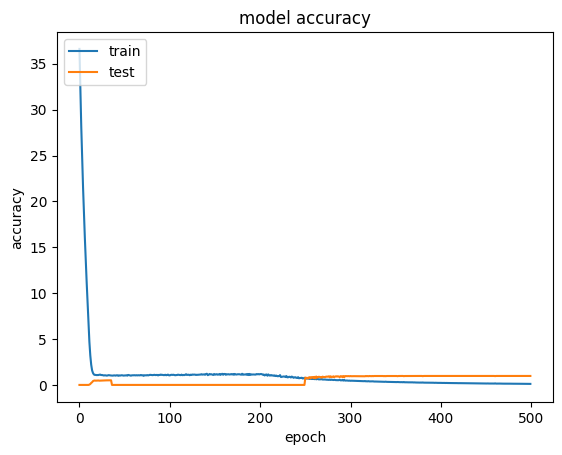

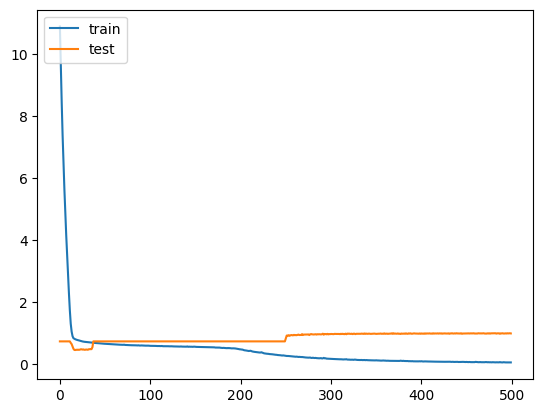

In [69]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['train','test'],loc='upper left')

----------------------